<a href="https://colab.research.google.com/github/hendra789-commits/MYSKILL-EXERCISE-2/blob/main/Python_Exercise(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import

In [ ]:
import pandas as pd
import io
from google.colab import files



In [ ]:
uploaded = files.upload()
df_ecomm = pd.read_csv(io.BytesIO(uploaded['ecommerce_event.csv']))

Saving ecommerce_event.csv to ecommerce_event.csv


In [ ]:
uploaded_2 = files.upload()
df_user = pd.read_csv(io.BytesIO(uploaded_2['user_profile.csv']))



Saving user_profile.csv to user_profile (2).csv


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

### Exercise

In [ ]:
df_ecomm.head()

,event_date,event_type,product_id,category,subcategory,brand,price,user_id,user_session
0,2019-10-23,view,1600600,computers,peripherals,hp,148.04,548757053,7b5e86eb-6c9f-4862-b9cb-20b773d64a75
1,2019-10-28,view,1004238,electronics,smartphone,apple,1243.79,512471699,7b21fd53-8f8d-44f7-b126-fcb63b4a34df
2,2019-10-31,view,1004566,electronics,smartphone,huawei,164.88,548430364,2e5a410f-0d20-41c9-82c1-aa1b4dcdd11d
3,2019-10-12,view,1003310,electronics,smartphone,apple,696.13,558364479,587402bb-2083-4a8c-a874-f270e3408db1
4,2019-10-28,view,4804295,electronics,audio,xiaomi,22.86,514732843,52ae3808-c842-4fbd-97a4-ea7c862aef35


In [ ]:
df_ecomm.event_type.unique()

array(['view', 'cart', 'purchase'], dtype=object)

In [ ]:
df_user.head()

,user_id,gender,age
0,548757053,Female,28
1,512471699,Female,52
2,548430364,Female,65
3,558364479,Female,38
4,514732843,Male,74


#### No 1 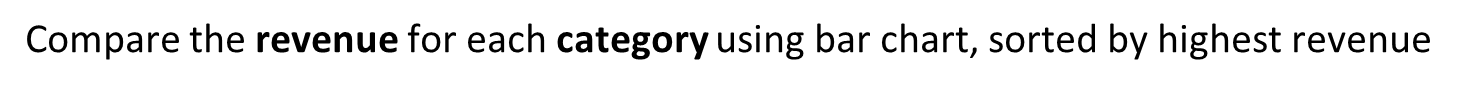

1. filter purchase
2. aggregate revenue untuk tiap kategori
3. sorting berdasarkan nilai paling tinggi
4. tentukan visualisasi yang tepat

In [ ]:
#no 1
df_ecomm_filter =df_ecomm.loc[df_ecomm['event_type'] == 'purchase']
df_ecomm_agg = df_ecomm_filter.groupby('category', as_index = False).agg(revenue = ('price', 'sum'))
df_ecomm_sort =df_ecomm_agg.sort_values('revenue', ascending= False)

In [ ]:
df_ecomm_agg = df_ecomm_filter.groupby('category', as_index = False).agg(revenue = ('price', 'sum'))
df_ecomm_agg.head()

,category,revenue
0,apparel,458.19
1,appliances,10406.17
2,auto,406.87
3,computers,4947.25
4,construction,455.49


In [ ]:
df_ecomm_sort.head()

,category,revenue
5,electronics,130933.02
1,appliances,10406.17
3,computers,4947.25
6,furniture,549.20
8,sport,478.52


In [ ]:
#no 1 cara lain untuk generate table yang dibutuhkan
df_ecomm_cat =df_ecomm.loc[df_ecomm['event_type'] == 'purchase'].groupby('category', as_index = False).agg(revenue = ('price', 'sum')).sort_values('revenue', ascending= False)

In [ ]:
df_ecomm_cat.head()

,category,revenue
5,electronics,130933.02
1,appliances,10406.17
3,computers,4947.25
6,furniture,549.20
8,sport,478.52


Text(0.5, 1.0, 'revenue by category')

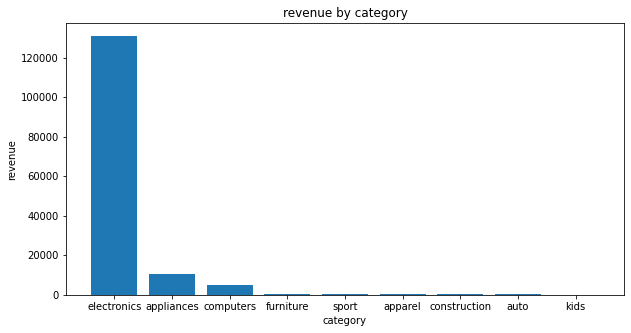

In [ ]:
plt.figure(figsize=(10, 5))
plt.bar(df_ecomm_sort['category'], df_ecomm_sort['revenue']) 
plt.xlabel('category')
plt.ylabel('revenue')
plt.title('revenue by category')

Text(0.5, 1.0, 'Revenue per Category')

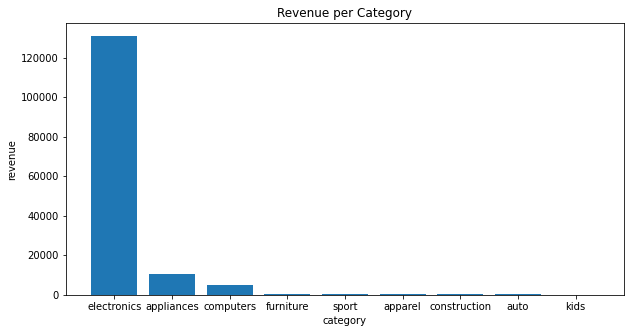

In [ ]:
# cara lain
fig, ax = plt.subplots(figsize=(10, 5)) 
ax.bar(df_ecomm_cat['category'], df_ecomm_cat['revenue'])  

ax.set_xlabel('category')  
ax.set_ylabel('revenue')  
ax.set_title("Revenue per Category") 


([<matplotlib.patches.Wedge at 0x7f68f749a890>,
 [Text(-1.0231100382538316, 0.4040369409153618, 'electronics'),
  Text(0.9477335976537502, -0.5583914647254915, 'appliances'),
  Text(1.0762574503154034, -0.22731014196596447, 'computers'),
  Text(1.0953427361805965, -0.10111523276146003, 'furniture'),
  Text(1.0972794095842908, -0.07731686298829046, 'sport'),
  Text(1.0985942442790237, -0.05559394244880054, 'apparel'),
  Text(1.0994624757792688, -0.03438407121503735, 'construction'),
  Text(1.099906347329917, -0.014353644253639055, 'auto'),
  Text(1.0999972707471726, -0.0024503772712701904, 'kids')])

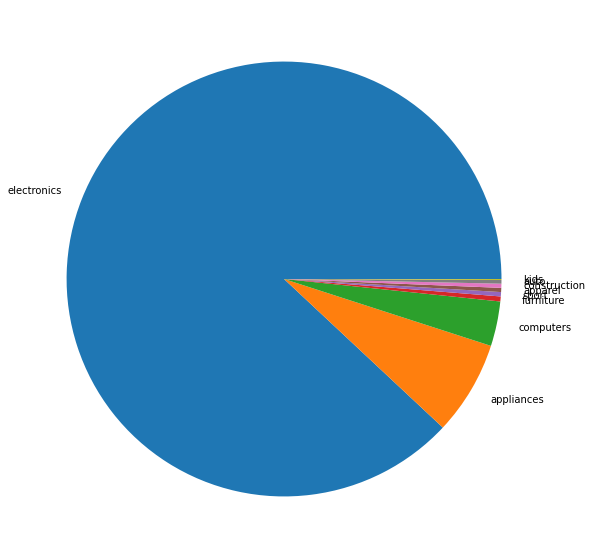

In [ ]:
plt.figure(figsize=(10, 10))
plt.pie( df_ecomm_cat['revenue'], labels= df_ecomm_cat['category']) 

#### No2 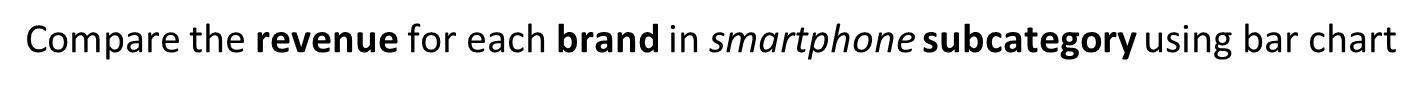

1. filter purchase
2. filter sub kategori smartphone
3. aggregate revenue berdasarkan brand

In [ ]:
df_ecomm.head()

,event_date,event_type,product_id,category,subcategory,brand,price,user_id,user_session
0,2019-10-23,view,1600600,computers,peripherals,hp,148.04,548757053,7b5e86eb-6c9f-4862-b9cb-20b773d64a75
1,2019-10-28,view,1004238,electronics,smartphone,apple,1243.79,512471699,7b21fd53-8f8d-44f7-b126-fcb63b4a34df
2,2019-10-31,view,1004566,electronics,smartphone,huawei,164.88,548430364,2e5a410f-0d20-41c9-82c1-aa1b4dcdd11d
3,2019-10-12,view,1003310,electronics,smartphone,apple,696.13,558364479,587402bb-2083-4a8c-a874-f270e3408db1
4,2019-10-28,view,4804295,electronics,audio,xiaomi,22.86,514732843,52ae3808-c842-4fbd-97a4-ea7c862aef35


In [ ]:
df_ecomm_filter = df_ecomm.loc[(df_ecomm['event_type'] == 'purchase') & (df_ecomm['subcategory'] == 'smartphone')]
df_ecomm_agg = df_ecomm_filter.groupby('brand', as_index = False).agg(revenue = ('price', 'sum'))
df_ecomm_sort =df_ecomm_agg.sort_values('revenue')

In [ ]:
# cara lain untuk membuat tabel yang dibutuhkan 
df_ecomm_brand =df_ecomm.loc[(df_ecomm['event_type'] == 'purchase') & (df_ecomm['subcategory'] == 'smartphone')
].groupby('brand', as_index = False).agg(revenue = ('price', 'sum')
).sort_values('revenue')

Text(0.5, 1.0, 'revenue by smartphone brand')

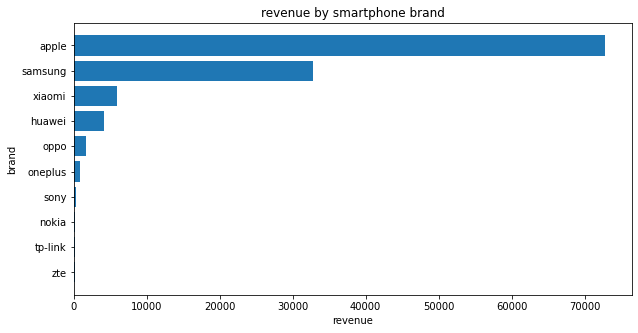

In [ ]:
plt.figure(figsize=(10, 5))
plt.barh(df_ecomm_sort['brand'], df_ecomm_sort['revenue'])

plt.xlabel('revenue')
plt.ylabel('brand')
plt.title('revenue by smartphone brand')

Text(0.5, 1.0, 'Revenue per Brand')

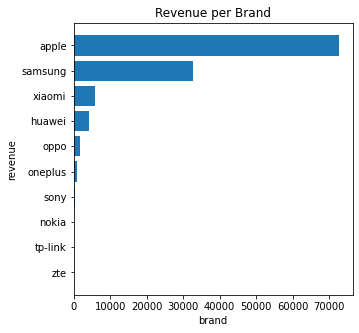

In [ ]:
# cara lain
fig, ax = plt.subplots(figsize=(5, 5)) 
ax.barh(df_ecomm_brand['brand'], df_ecomm_brand['revenue'])  

ax.set_xlabel('brand')  
ax.set_ylabel('revenue')  
ax.set_title("Revenue per Brand") 


#### No3 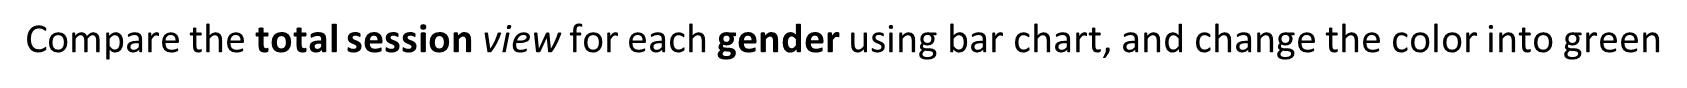

1. join dgn tabel user
2. filter event type nya view
3. aggregate total session
4. diubah warna hijau

In [ ]:
df_ecomm.head()

,event_date,event_type,product_id,category,subcategory,brand,price,user_id,user_session
0,2019-10-23,view,1600600,computers,peripherals,hp,148.04,548757053,7b5e86eb-6c9f-4862-b9cb-20b773d64a75
1,2019-10-28,view,1004238,electronics,smartphone,apple,1243.79,512471699,7b21fd53-8f8d-44f7-b126-fcb63b4a34df
2,2019-10-31,view,1004566,electronics,smartphone,huawei,164.88,548430364,2e5a410f-0d20-41c9-82c1-aa1b4dcdd11d
3,2019-10-12,view,1003310,electronics,smartphone,apple,696.13,558364479,587402bb-2083-4a8c-a874-f270e3408db1
4,2019-10-28,view,4804295,electronics,audio,xiaomi,22.86,514732843,52ae3808-c842-4fbd-97a4-ea7c862aef35


In [ ]:
df_user.head()

,user_id,gender,age
0,548757053,Female,28
1,512471699,Female,52
2,548430364,Female,65
3,558364479,Female,38
4,514732843,Male,74


In [ ]:
df_merge = pd.merge(df_ecomm, df_user, how = 'inner', on= 'user_id')
df_merge_session =df_merge.loc[(df_merge['event_type'] == 'view')]
df_merge_session_agg = df_merge_session.groupby('gender', as_index = False).agg(num_session = ('user_session', 'nunique'))

<BarContainer object of 2 artists>

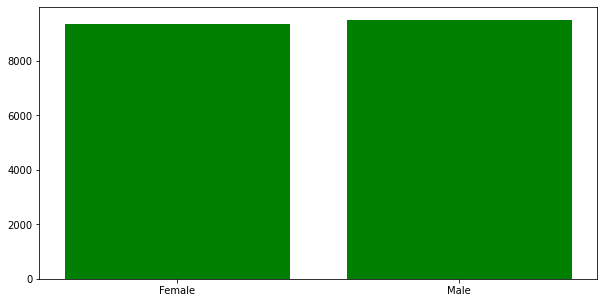

In [ ]:
plt.figure(figsize=(10, 5))
plt.bar(df_merge_session_agg['gender'], df_merge_session_agg['num_session'], color = 'green')

In [ ]:
# cara lain 
df_merge = pd.merge(df_ecomm, df_user, how = 'inner', on= 'user_id')
df_merge_session =df_merge.loc[(df_merge['event_type'] == 'view')].groupby('gender', as_index = False).agg(num_session = ('user_session', 'nunique'))

Text(0.5, 1.0, 'Session per gender')

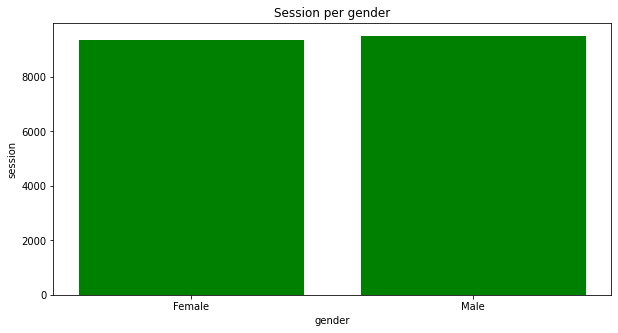

In [ ]:
# cara lain
fig, ax = plt.subplots(figsize=(10, 5)) 
ax.bar(df_merge_session['gender'], df_merge_session['num_session'], color = 'g')  

ax.set_xlabel('gender')  
ax.set_ylabel('session')  
ax.set_title("Session per gender") 


#### No4 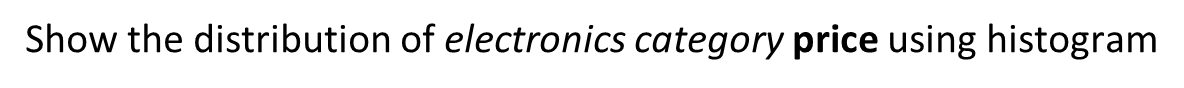

In [ ]:
df_ecomm.head()

,event_date,event_type,product_id,category,subcategory,brand,price,user_id,user_session
0,2019-10-23,view,1600600,computers,peripherals,hp,148.04,548757053,7b5e86eb-6c9f-4862-b9cb-20b773d64a75
1,2019-10-28,view,1004238,electronics,smartphone,apple,1243.79,512471699,7b21fd53-8f8d-44f7-b126-fcb63b4a34df
2,2019-10-31,view,1004566,electronics,smartphone,huawei,164.88,548430364,2e5a410f-0d20-41c9-82c1-aa1b4dcdd11d
3,2019-10-12,view,1003310,electronics,smartphone,apple,696.13,558364479,587402bb-2083-4a8c-a874-f270e3408db1
4,2019-10-28,view,4804295,electronics,audio,xiaomi,22.86,514732843,52ae3808-c842-4fbd-97a4-ea7c862aef35


In [ ]:
df_el =df_ecomm.loc[(df_ecomm['category'] == 'electronics')]

(array([6176., 2397., 1378.,  940.,  342.,  293.,  173.,   56.,   23.,
          21.]), array([8.800000e-01, 2.581990e+02, 5.155180e+02, 7.728370e+02,
        1.030156e+03, 1.287475e+03, 1.544794e+03, 1.802113e+03,
        2.059432e+03, 2.316751e+03, 2.574070e+03]), <a list of 10 Patch objects>)

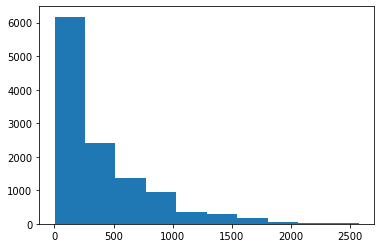

In [ ]:
plt.hist(df_el['price'])

Text(0.5, 1.0, 'Electronics price distribution')

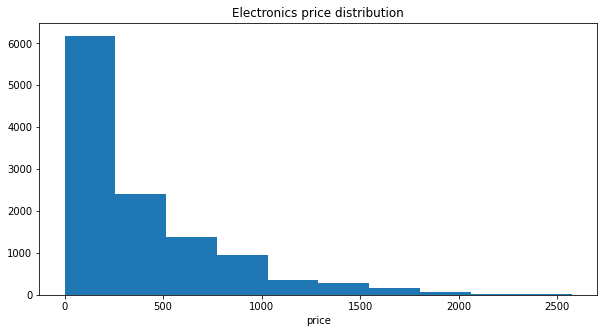

In [ ]:
# cara lain
fig, ax = plt.subplots(figsize=(10, 5)) 
ax.hist(df_el['price'])  

ax.set_xlabel('price')    
ax.set_title("Electronics price distribution") 


#### No5 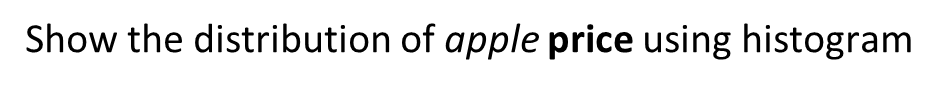

In [ ]:
df_apple = df_ecomm.loc[(df_ecomm['brand'] == 'apple')]

(array([301., 548., 782., 637., 253., 277., 191.,  24.,  43.,  11.]),
 array([  22.78 ,  272.735,  522.69 ,  772.645, 1022.6  , 1272.555,
        1522.51 , 1772.465, 2022.42 , 2272.375, 2522.33 ]),
 <a list of 10 Patch objects>)

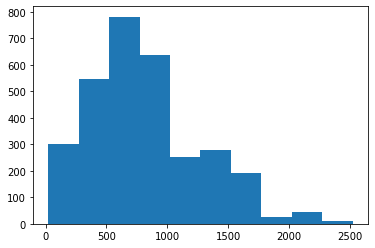

In [ ]:
plt.hist(df_apple['price']) 

Text(0.5, 1.0, 'Apple price distribution')

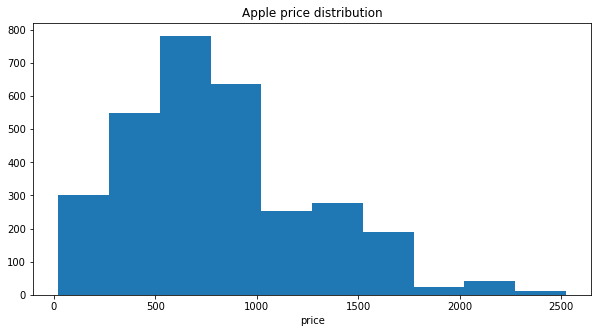

In [ ]:
# cara lain
fig, ax = plt.subplots(figsize=(10, 5)) 
ax.hist(df_apple['price'])  

ax.set_xlabel('price')    
ax.set_title("Apple price distribution") 


#### No6 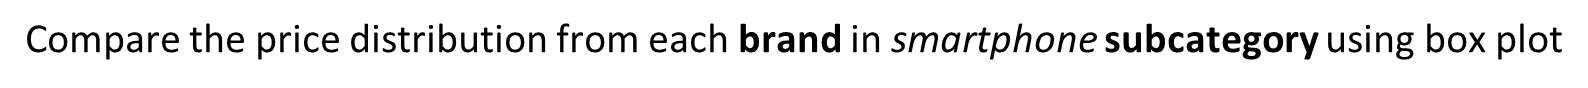

1. filter sub kategori smartphone
2. 

In [ ]:
df_smartphone =df_ecomm.loc[(df_ecomm['subcategory'] == 'smartphone')]


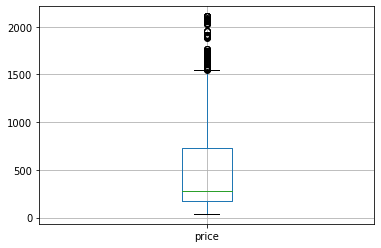

In [ ]:
# data frame . boxplot ( column = kolom_yang_dilihat_distribusinya, by = kategori)
df_smartphone.boxplot(column =['price'])


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


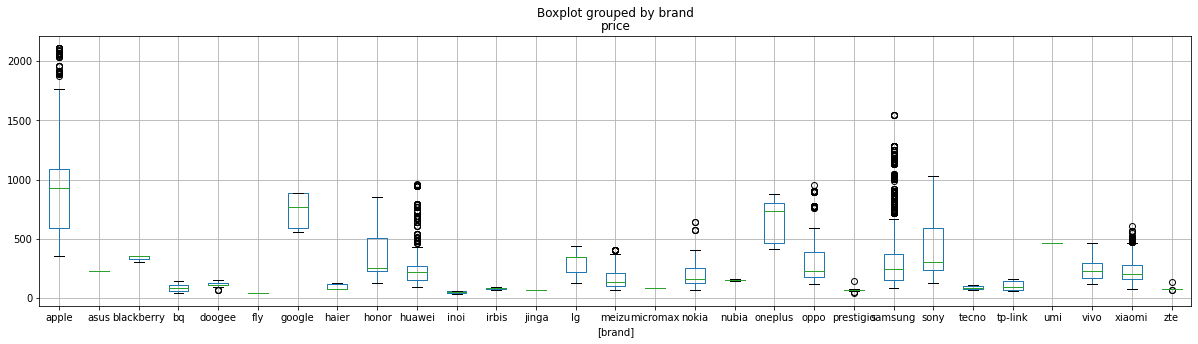

In [ ]:
df_smartphone =df_ecomm.loc[(df_ecomm['subcategory'] == 'smartphone')]

df_smartphone.boxplot(column =['price'], by = ['brand'], figsize =(20,5))


#### No 7 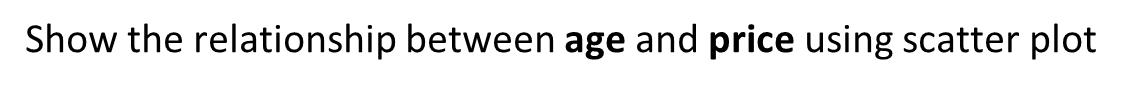

In [ ]:
df_ecomm.head()

,event_date,event_type,product_id,category,subcategory,brand,price,user_id,user_session
0,2019-10-23,view,1600600,computers,peripherals,hp,148.04,548757053,7b5e86eb-6c9f-4862-b9cb-20b773d64a75
1,2019-10-28,view,1004238,electronics,smartphone,apple,1243.79,512471699,7b21fd53-8f8d-44f7-b126-fcb63b4a34df
2,2019-10-31,view,1004566,electronics,smartphone,huawei,164.88,548430364,2e5a410f-0d20-41c9-82c1-aa1b4dcdd11d
3,2019-10-12,view,1003310,electronics,smartphone,apple,696.13,558364479,587402bb-2083-4a8c-a874-f270e3408db1
4,2019-10-28,view,4804295,electronics,audio,xiaomi,22.86,514732843,52ae3808-c842-4fbd-97a4-ea7c862aef35


1. join
2. 

In [ ]:
df_merge = pd.merge(df_ecomm, df_user, how = 'inner', on= 'user_id')

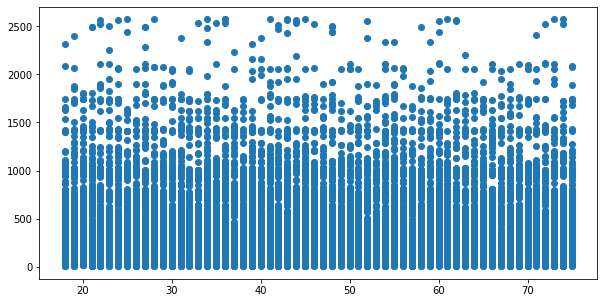

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(df_merge['age'], df_merge['price'])

In [ ]:
df_merge[['age','price']].corr()

,age,price
age,1.000000,-0.004754
price,-0.004754,1.000000


Text(0.5, 1.0, 'Price and Age relation')

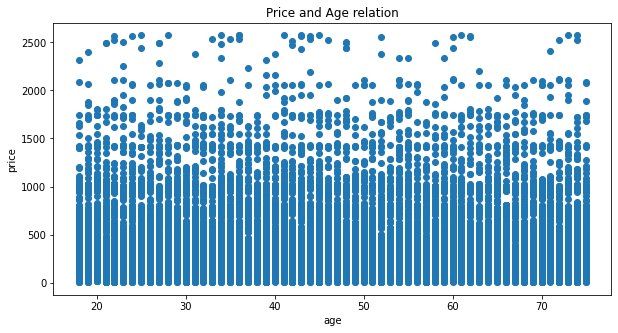

In [ ]:
# cara lain
fig, ax = plt.subplots(figsize=(10, 5)) 
ax.scatter(df_merge['age'], df_merge['price'])  

ax.set_xlabel('age')    
ax.set_ylabel('price')    
ax.set_title("Price and Age relation") 


#### No8 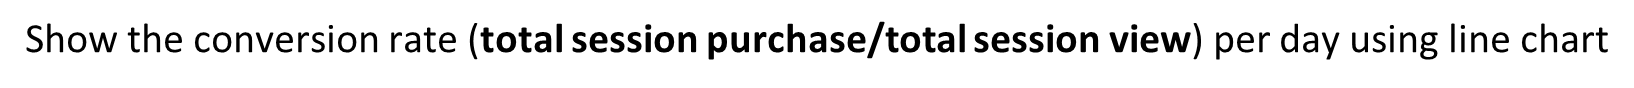

Tabel total session purchase
1. filter event type = purchase
2. aggregate total session tiap hari

tabel total sesson view
1. filter event type = view
2. aggregate total session tiap hari

final tabel
pembagian antara total session purchase dg total session view

In [ ]:
df_purchase_daily =df_ecomm.loc[df_ecomm['event_type'] == 'purchase'].groupby('event_date', as_index = False).agg(num_session_purchase = ('user_session', 'nunique'))

df_view_daily =df_ecomm.loc[df_ecomm['event_type'] == 'view'].groupby('event_date', as_index = False).agg(num_session_view = ('user_session', 'nunique')
)

df_merge_daily = pd.merge(df_purchase_daily, df_view_daily,  how = 'inner', on= 'event_date').sort_values('event_date')

df_merge_daily['conversion_rate'] = df_merge_daily['num_session_purchase']/df_merge_daily['num_session_view']

In [ ]:
df_purchase_daily.head()

,event_date,num_session_purchase
0,2019-10-01,6
1,2019-10-02,8
2,2019-10-03,12
3,2019-10-04,21
4,2019-10-05,15


In [ ]:
df_view_daily.head()

,event_date,num_session_view
0,2019-10-01,591
1,2019-10-02,511
2,2019-10-03,525
3,2019-10-04,662
4,2019-10-05,622


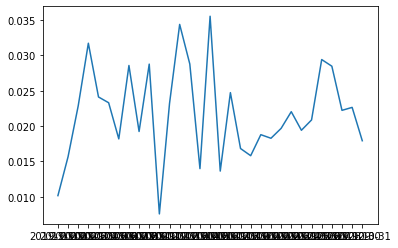

In [ ]:
plt.plot(df_merge_daily['event_date'], df_merge_daily['conversion_rate'])

Text(0.5, 1.0, 'Daily conversion rate')

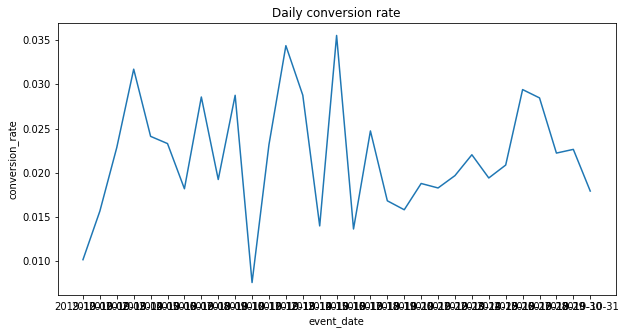

In [ ]:
# cara lain
fig, ax = plt.subplots(figsize=(10, 5)) 
ax.plot(df_merge_daily['event_date'], df_merge_daily['conversion_rate'])  


ax.set_xlabel('event_date')  
ax.set_ylabel('conversion_rate')  
ax.set_title("Daily conversion rate") 

#### No9 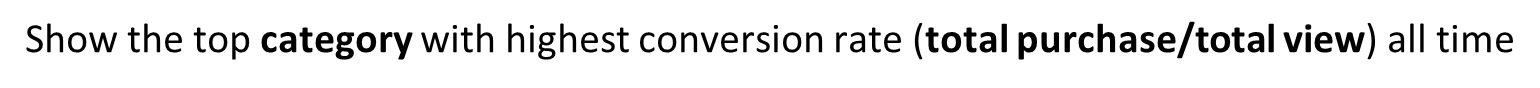

In [ ]:
df_purchase_cat =df_ecomm.loc[df_ecomm['event_type'] == 'purchase'].groupby('category', as_index = False).agg(num_session_purchase = ('user_session', 'nunique')
)

df_view_cat =df_ecomm.loc[df_ecomm['event_type'] == 'view'].groupby('category', as_index = False).agg(num_session_view = ('user_session', 'nunique')
)

df_merge_cat = pd.merge(df_purchase_cat, df_view_cat,  how = 'inner', on= 'category').sort_values('category')

df_merge_cat['conversion_rate'] = df_merge_cat['num_session_purchase']/df_merge_cat['num_session_view']

In [ ]:
df_purchase_cat.head()

,category,num_session_purchase
0,apparel,6
1,appliances,63
2,auto,5
3,computers,14
4,construction,4


In [ ]:
df_view_cat.head()

,category,num_session_view
0,accessories,174
1,apparel,891
2,appliances,3390
3,auto,550
4,computers,1656


In [ ]:
df_merge_cat.head()

,category,num_session_purchase,num_session_view,conversion_rate
0,apparel,6,891,0.006734
1,appliances,63,3390,0.018584
2,auto,5,550,0.009091
3,computers,14,1656,0.008454
4,construction,4,407,0.009828


<BarContainer object of 9 artists>

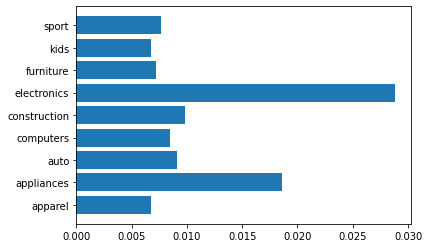

In [ ]:
plt.barh(df_merge_cat['category'], df_merge_cat['conversion_rate'])

Text(0.5, 1.0, 'Category conversion rate')

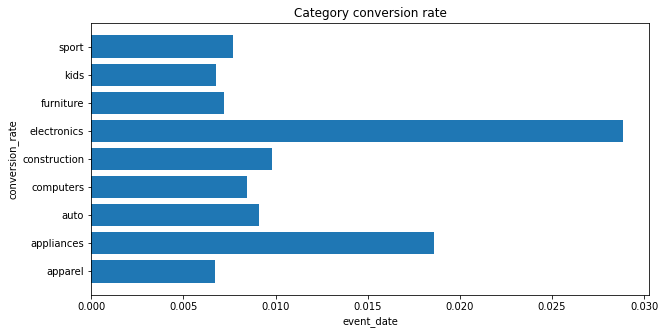

In [ ]:
# cara lain
fig, ax = plt.subplots(figsize=(10, 5)) 
ax.barh(df_merge_cat['category'], df_merge_cat['conversion_rate'])  


ax.set_xlabel('event_date')  
ax.set_ylabel('conversion_rate')  
ax.set_title("Category conversion rate") 

#### No10 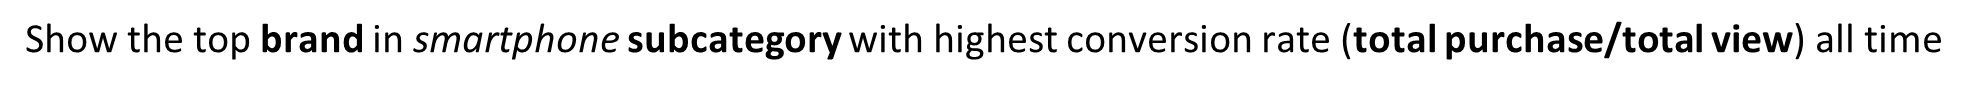

In [ ]:
df_purchase_brand =df_ecomm.loc[(df_ecomm['subcategory'] == 'smartphone') & (df_ecomm['event_type'] == 'purchase')].groupby('brand', as_index = False).agg(num_session_purchase = ('user_session', 'nunique')
)

df_view_brand =df_ecomm.loc[(df_ecomm['subcategory'] == 'smartphone') & (df_ecomm['event_type'] == 'view')].groupby('brand', as_index = False).agg(num_session_view = ('user_session', 'nunique')
)

df_merge_brand = pd.merge(df_purchase_brand, df_view_brand,  how = 'inner', on= 'brand').sort_values('brand')

df_merge_brand['conversion_rate'] = df_merge_brand['num_session_purchase']/df_merge_brand['num_session_view']

<BarContainer object of 10 artists>

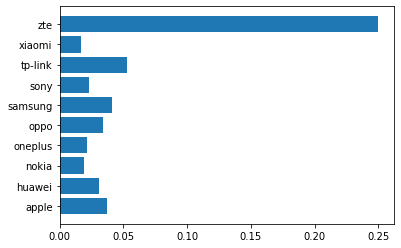

In [ ]:
plt.barh(df_merge_brand['brand'], df_merge_brand['conversion_rate'])

Text(0.5, 1.0, 'Brand conversion rate')

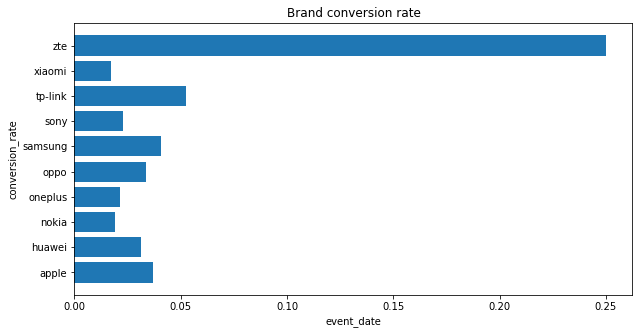

In [ ]:
# cara lain
fig, ax = plt.subplots(figsize=(10, 5)) 
ax.barh(df_merge_brand['brand'], df_merge_brand['conversion_rate'])  


ax.set_xlabel('event_date')  
ax.set_ylabel('conversion_rate')  
ax.set_title("Brand conversion rate") 